# Go Emotion Pre-Processing

In [2]:
import re
import pandas as pd 
import emoji
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import seaborn as sns
#from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import ast


In [3]:
GoEmotion_train= pd.read_csv('Go_Emotion_Google/go_emotions_train.csv')
GoEmotion_test = pd.read_csv('Go_Emotion_Google/go_emotions_test.csv')
GoEmotion_val = pd.read_csv('Go_Emotion_Google/go_emotions_validation.csv')

df_train = pd.DataFrame(GoEmotion_train)
df_test = pd.DataFrame(GoEmotion_test)
df_validation = pd.DataFrame(GoEmotion_val)


print("\tTrain : \n", df_train["text"].head(10), "\n\n\tTest : \n", df_test["text"].head(10), "\n\n\tValidation : \n", df_validation["text"].head(10))



	Train : 
 0    My favourite food is anything I didn't have to...
1    Now if he does off himself, everyone will thin...
2                       WHY THE FUCK IS BAYLESS ISOING
3                          To make her feel threatened
4                               Dirty Southern Wankers
5    OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...
6    Yes I heard abt the f bombs! That has to be wh...
7    We need more boards and to create a bit more s...
8    Damn youtube and outrage drama is super lucrat...
9    It might be linked to the trust factor of your...
Name: text, dtype: object 

	Test : 
 0    I’m really sorry about your situation :( Altho...
1      It's wonderful because it's awful. At not with.
2    Kings fan here, good luck to you guys! Will be...
3    I didn't know that, thank you for teaching me ...
4    They got bored from haunting earth for thousan...
5    Thank you for asking questions and recognizing...
6                                       You’re welcome
7               

In [4]:
print("Training Info: ", df_train.info())
print("Testing Info: ", df_test.info())
print("Validation Info: ", df_validation.info())

print("Training Null Values : ", df_train.isnull().sum())
print("Testing Null Values : ", df_test.isnull().sum())
print("Validation Null Values : ", df_validation.isnull().sum())

print("Training Shape: ", df_train.shape)
print("Testing Shape: ", df_test.shape)
print("Validation Shape: ", df_validation.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43410 entries, 0 to 43409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    43410 non-null  object
 1   labels  43410 non-null  object
 2   id      43410 non-null  object
dtypes: object(3)
memory usage: 1017.6+ KB
Training Info:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5427 entries, 0 to 5426
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5427 non-null   object
 1   labels  5427 non-null   object
 2   id      5427 non-null   object
dtypes: object(3)
memory usage: 127.3+ KB
Testing Info:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5426 entries, 0 to 5425
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5426 non-null   object
 1   labels  5426 non-null   object
 2   id      5426 non-null   object
dtypes: object

In [5]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)
df_validation.drop_duplicates(inplace=True)

print("Training Shape: ", df_train.shape)
print("Testing Shape: ", df_test.shape)
print("Validation Shape: ", df_validation.shape)

Training Shape:  (43410, 3)
Testing Shape:  (5427, 3)
Validation Shape:  (5426, 3)


In [6]:
training_text = df_train["text"] # Extracting text from data Frame
test_text = df_test["text"]
validation_text = df_validation["text"]

In [7]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove unwanted punctuations
    
    # Handle specific punctuations and emoticons
    emoticon_dict = {
        ":)": "happy",
        ":))": "happy",
        ":-)": "happy",
        ":-))": "happy",
        ":(": "sad",
        ":((": "sad",
        ":-((": "sad",
        ":-((": "sad",
        ":/": "confusion", 
        "://": "confusion", 
        ":-/": "confusion",
        ":-//": "confusion",
        ":\\": "confusion",
        ":-\\": "confusion",
        ":|": "neutral",
        ":-|": "neutral",
        "XD": "laugh",
        ":D": "laugh",
        ":-D": "laugh"
    }
    
    # Replace emoticons with words
    for emoticon, replacement in emoticon_dict.items():
        text = text.replace(emoticon, replacement)
    
    # Handle emojis
    text = emoji.demojize(text)
    
    # Remove non-alphanumeric characters except spaces (next line removes unnecessary spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


In [8]:


print(preprocess_text("I'm Amirali :), hahaha 😸😸🤣🤣🤣🤣🤣🤣🤣🤣"))

im amirali happy hahaha grinningcatwithsmilingeyesgrinningcatwithsmilingeyesrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughing


In [9]:
# Apply preprocessing to the text column
df_train['cleaned_text'] = df_train['text'].apply(preprocess_text)
df_test['cleaned_text'] = df_test['text'].apply(preprocess_text)
df_validation['cleaned_text'] = df_validation['text'].apply(preprocess_text)


print("\tTraining ... \n\n", df_train[['text', 'cleaned_text']].head())
print("\n")
print("\n\tTesting ... \n\n", df_test[['text', 'cleaned_text']].head())
print("\n")
print("\n\tValidation ... \n\n", df_validation[['text', 'cleaned_text']].head())

	Training ... 

                                                 text  \
0  My favourite food is anything I didn't have to...   
1  Now if he does off himself, everyone will thin...   
2                     WHY THE FUCK IS BAYLESS ISOING   
3                        To make her feel threatened   
4                             Dirty Southern Wankers   

                                        cleaned_text  
0  my favourite food is anything i didnt have to ...  
1  now if he does off himself everyone will think...  
2                     why the fuck is bayless isoing  
3                        to make her feel threatened  
4                             dirty southern wankers  



	Testing ... 

                                                 text  \
0  I’m really sorry about your situation :( Altho...   
1    It's wonderful because it's awful. At not with.   
2  Kings fan here, good luck to you guys! Will be...   
3  I didn't know that, thank you for teaching me ...   
4  They got bored

In [10]:

def bar_chart(title, x_label, y_label, data):
    # Plot the most frequent words
    plt.figure(figsize=(10, 6))
    data.head(20).plot(kind='bar')
    plt.title('Top 20 Most Frequent Words (BoW)')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()
    
def BoW(corpus):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    word_counts = df_bow.sum(axis=0).sort_values(ascending=False)
    
    # Use word cloud for representation 
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_counts)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud (BoW)')
    plt.show()
    
    # Plot heatmap for top 50 words
    top_words = word_counts.head(20).index
    df_top_bow = df_bow[top_words]

    plt.figure(figsize=(12, 8))
    sns.heatmap(df_top_bow, annot=False, cmap='YlGnBu', cbar=True, yticklabels=False)
    plt.title('Heatmap of Top 50 Word Frequencies (BoW)')
    plt.xlabel('Words')
    plt.ylabel('Documents')
    plt.show()
    
    # Convert to long format for scatter plot
    df_bow_long = df_bow[top_words].stack().reset_index()
    df_bow_long.columns = ['Document', 'Word', 'Count']

    # Plot scatter plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_bow_long, x='Word', y='Count', hue='Document', palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Scatter Plot of Word Frequencies (BoW)')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.show()

    
def TF_IDF(corpus):
    tfidf_vectorizer = TfidfVectorizer()
    X_tfidf = tfidf_vectorizer.fit_transform(corpus)
    df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    word_tfidf = df_tfidf.sum(axis=0).sort_values(ascending=False)
    
    # Use word cloud for representation
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_tfidf)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud (TFIDF)')
    plt.show()
    
    # Plot heatmap for top 50 words
    top_words = word_tfidf.head(20).index
    df_top_tfidf = df_tfidf[top_words]

    plt.figure(figsize=(12, 8))
    sns.heatmap(df_top_tfidf, annot=False, cmap='YlGnBu', cbar=True, yticklabels=False)
    plt.title('Heatmap of Top 50 TFIDF Scores')
    plt.xlabel('Words')
    plt.ylabel('Documents')
    plt.show()
    
    # Convert to long format for scatter plot
    df_tfidf_long = df_tfidf[top_words].stack().reset_index()
    df_tfidf_long.columns = ['Document', 'Word', 'TFIDF']

    # Plot scatter plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_tfidf_long, x='Word', y='TFIDF', hue='Document', palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Scatter Plot of TFIDF Scores')
    plt.xlabel('Words')
    plt.ylabel('TFIDF')
    plt.show()





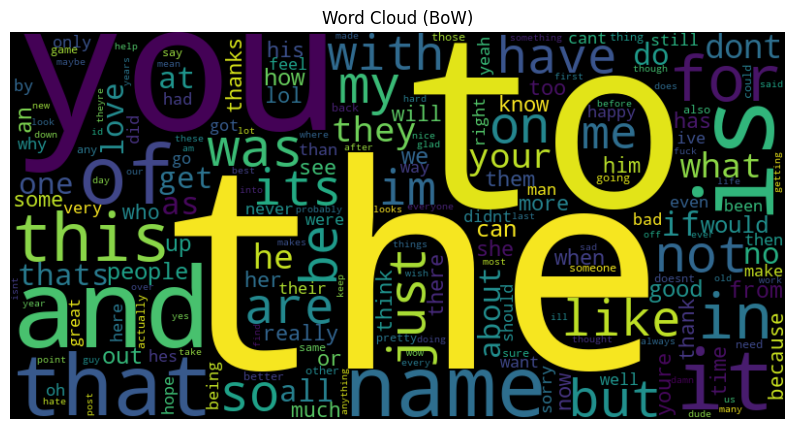

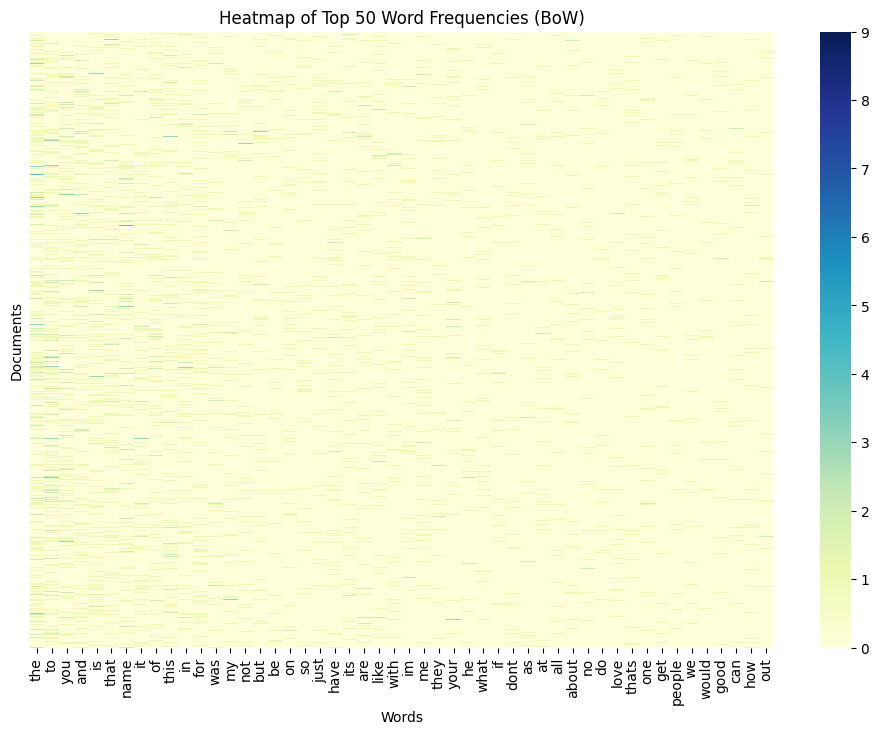

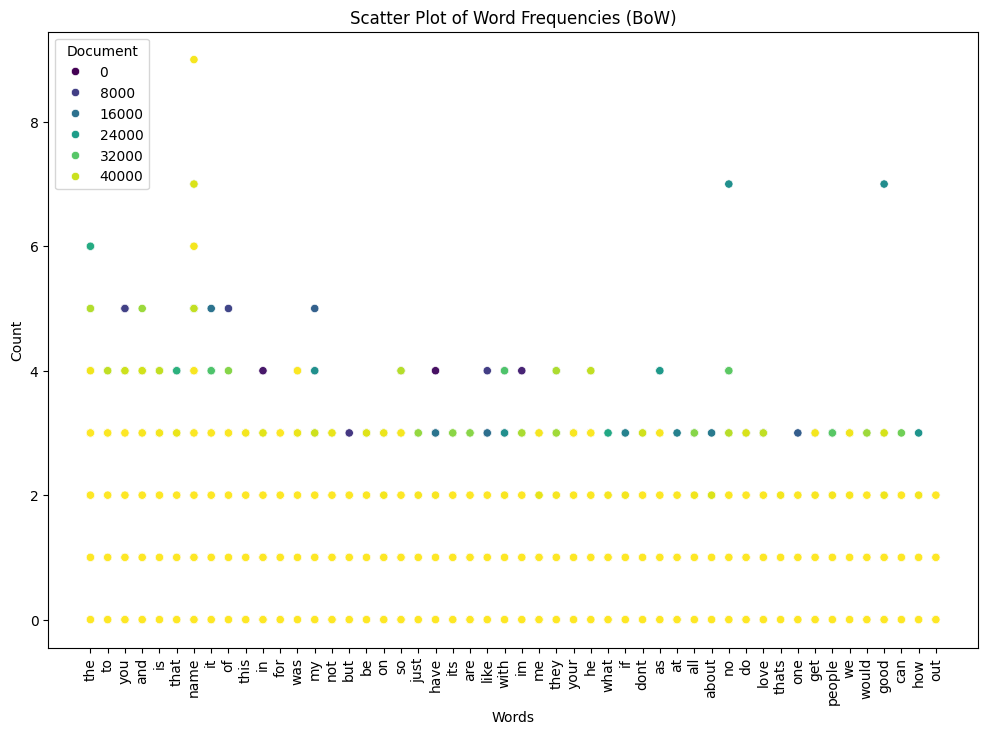

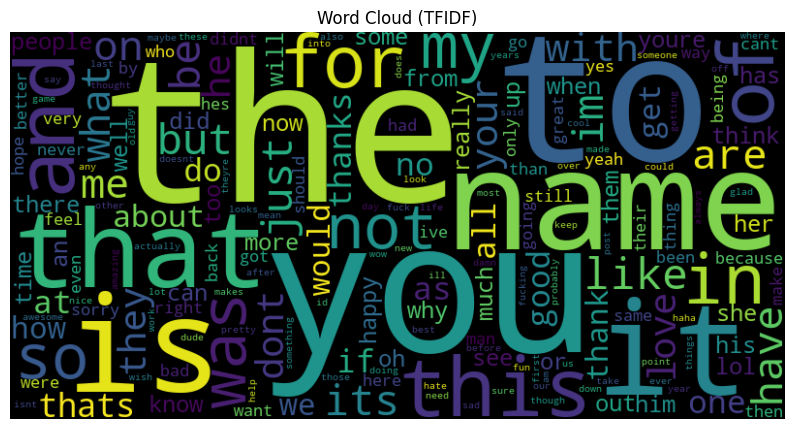

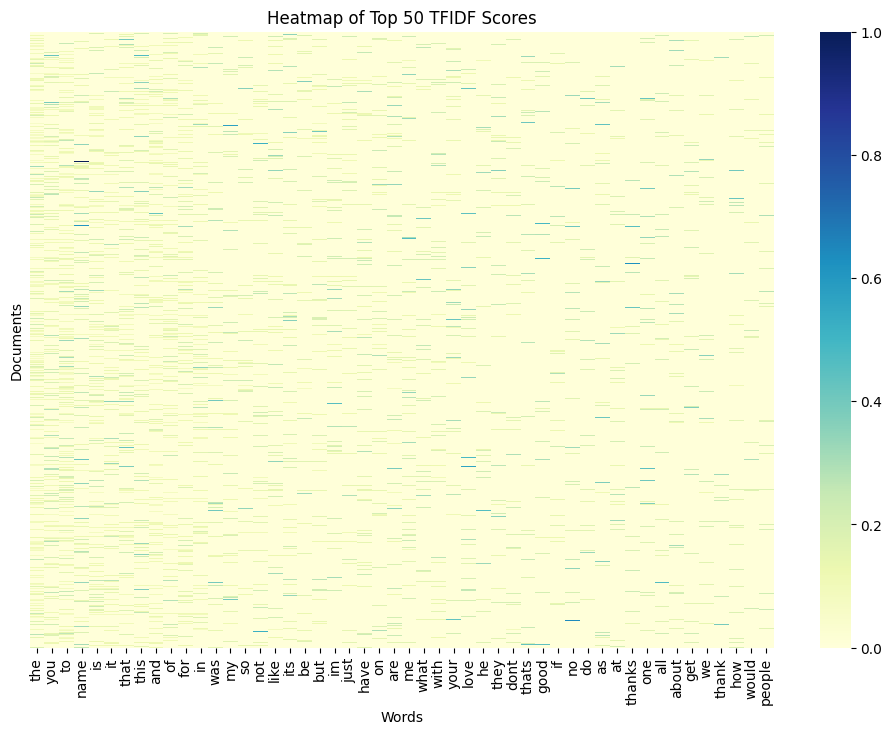

/Users/amirali/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


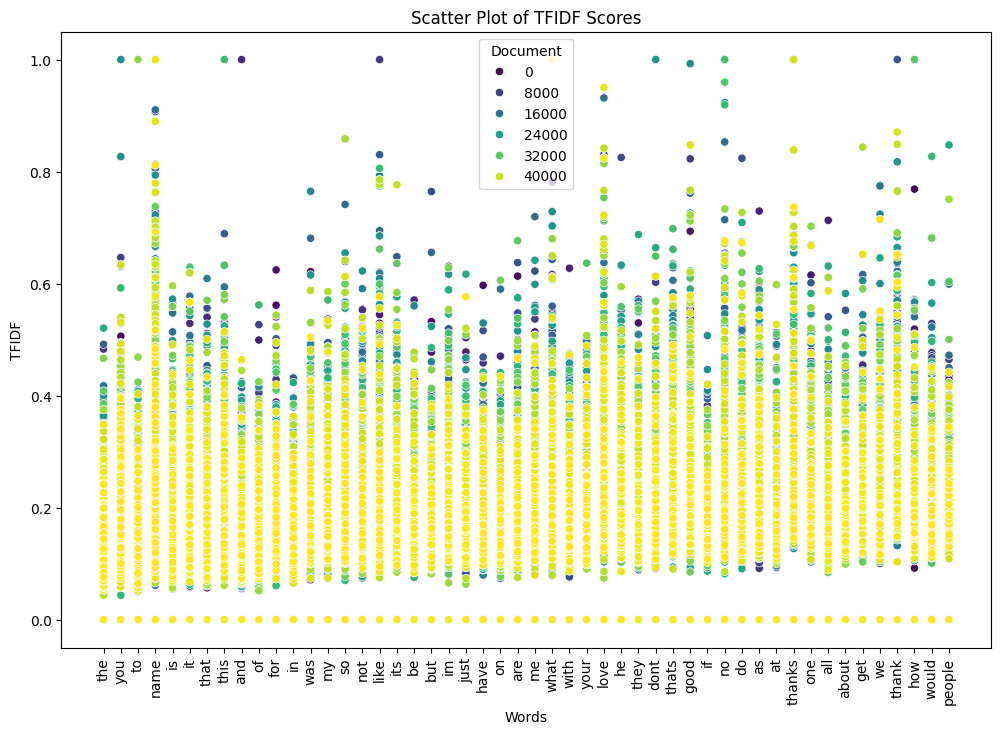

In [11]:
BoW(df_train["cleaned_text"])
TF_IDF(df_train["cleaned_text"])


In [12]:
def string_to_list(label_str):
    """
    Convert string representation of an array into a list of integers.
    
    Args:
    label_str (str): String representation of an array, e.g., '[6 7]'.
    
    Returns:
    list: A list of integers.
    """
    return [int(x) for x in label_str.strip('[]').replace(',', '').split()]

In [13]:
# The index of each emotion refers to the value stored for each emotion as label, those can be translated by these explanations 
emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire',
            'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
            'joy', 'love', 'nervousness','optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

positive = {"admiration", "amusement", "approval", "caring", "desire", "excitement",
            "gratitude", "joy", "love", "optimism", "pride", "relief"}

ambiguous = {"confusion", "curiosity", "surprise", "realization", "neutral"}

negative = {"anger", "annoyance", "disappointment", "disapproval", "disgust",
            "embarrassment", "fear", "grief", "nervousness", "remorse", "sadness"}

In [23]:

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']  # Compound score between -1 and 1


All_DF = [df_train, df_test, df_validation]
for df in All_DF:
    df['emotions'] = None

    for i in range(len(df['text'])):
        clean_sentiment_score = get_sentiment(df['cleaned_text'][i])
        text_sentiment_score = get_sentiment(df['text'][i])
        
        indexes = df['labels'][i]
        parsed_indexes = list(string_to_list(indexes))
        
        df.at[i, 'labels'] = str(parsed_indexes)
        
        emotion_texts = []
        for index in parsed_indexes:
            emotion_texts.append(emotions[index])
        
        df.at[i, 'emotions'] = emotion_texts
        
        for emotion in emotion_texts:
            if emotion not in positive:
                print(emotion)
            if (clean_sentiment_score < -0.7 or text_sentiment_score < -0.7) and emotion not in negative:
                print("NEmotion : ", emotion, "\t clean_sentiment_score : ", clean_sentiment_score,  "\t Clean text : ", df['cleaned_text'][i])
                print("Text_sentiment_score : ", text_sentiment_score, "\t Text : ", df['text'][i], "\n")
            elif (clean_sentiment_score > 0.7 or text_sentiment_score > 0.7) and emotion not in positive :
                    print("PEmotion : ", emotion, "\t clean_sentiment_score : ", clean_sentiment_score,  "\t Clean text : ", df['cleaned_text'][i])
                    print("Text_sentiment_score : ", text_sentiment_score, "\t Text : ", df['text'][i], "\n")
            
            elif (clean_sentiment_score < -0.6 or text_sentiment_score < -0.6) and emotion in ambiguous:
                print("-------------------------------------------------------------------------------------------")
                print("Emotion : ", emotion, "\t clean_sentiment_score : ", clean_sentiment_score,  "\t Clean text : ", df['cleaned_text'][i])
                print("Text_sentiment_score : ", text_sentiment_score, "\t Text : ", df['text'][i], "\n")
                print("-------------------------------------------------------------------------------------------")
            
    print(df.head(50))


neutral
neutral
anger
fear
annoyance
surprise
neutral
PEmotion :  neutral 	 clean_sentiment_score :  0.7579 	 Clean text :  it might be linked to the trust factor of your friend
Text_sentiment_score :  0.7579 	 Text :  It might be linked to the trust factor of your friend. 

confusion
neutral
annoyance
annoyance
embarrassment
anger
neutral
confusion
realization
confusion
disappointment
neutral
embarrassment
neutral
neutral
neutral
anger
neutral
grief
sadness
neutral
anger
confusion
neutral
anger
curiosity
confusion
neutral
sadness
neutral
grief
neutral
neutral
curiosity
disapproval
neutral
PEmotion :  neutral 	 clean_sentiment_score :  0.7506 	 Clean text :  its a better option because its my life and none of your business lmfao who are you
Text_sentiment_score :  0.7506 	 Text :  It's a better option because it's my life and none of your business? Lmfao, who are you 

neutral
neutral
neutral
neutral
neutral
disapproval
neutral
neutral
neutral
embarrassment
neutral
neutral
neutral
neut

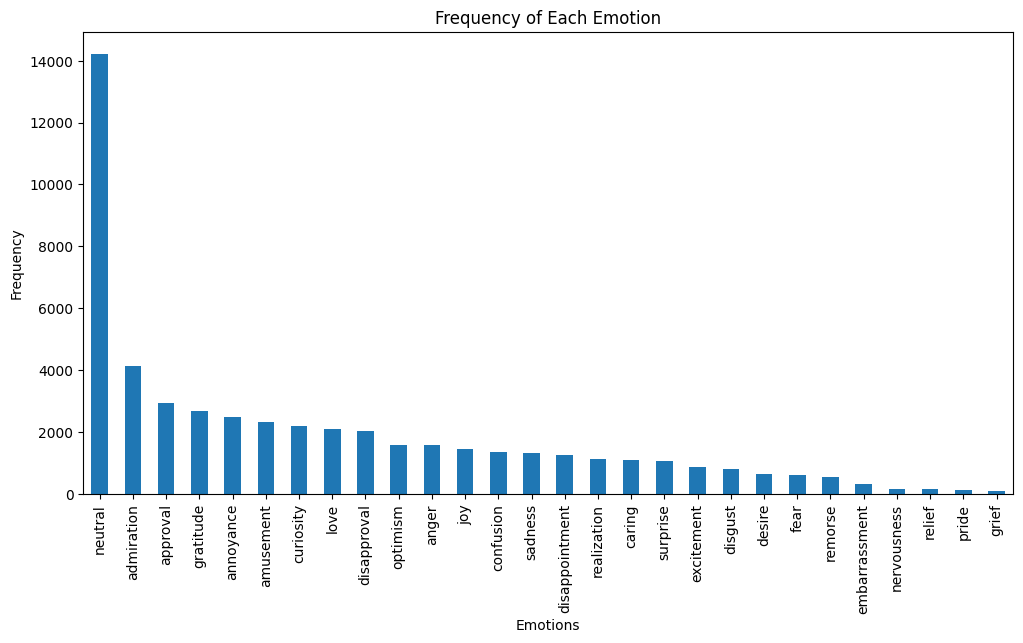

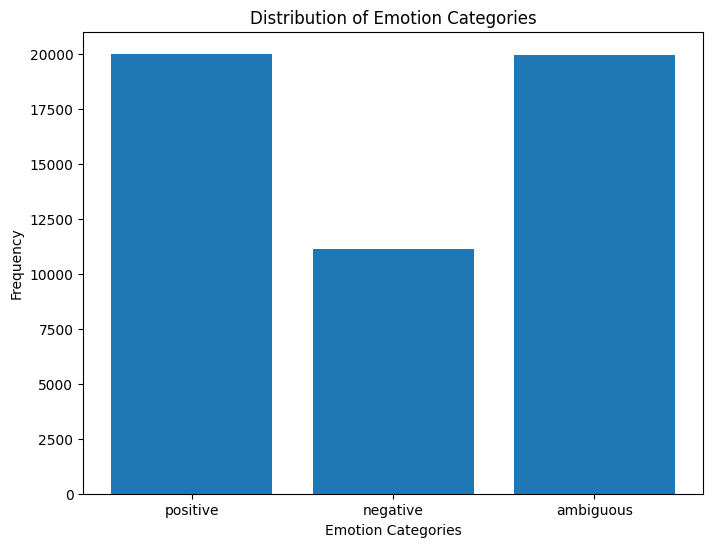

In [27]:
# Frequency of each emotion
emotion_counts = df_train['emotions'].explode().value_counts()
plt.figure(figsize=(12, 6))
emotion_counts.plot(kind='bar')
plt.title('Frequency of Each Emotion')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.show()

# Distribution of positive, negative, and ambiguous emotions
emotion_categories = {
    'positive': 0,
    'negative': 0,
    'ambiguous': 0
}

for emotion in df_train['emotions'].explode():
    if emotion in positive:
        emotion_categories['positive'] += 1
    elif emotion in negative:
        emotion_categories['negative'] += 1
    else:
        emotion_categories['ambiguous'] += 1

plt.figure(figsize=(8, 6))
plt.bar(emotion_categories.keys(), emotion_categories.values())
plt.title('Distribution of Emotion Categories')
plt.xlabel('Emotion Categories')
plt.ylabel('Frequency')
plt.show()


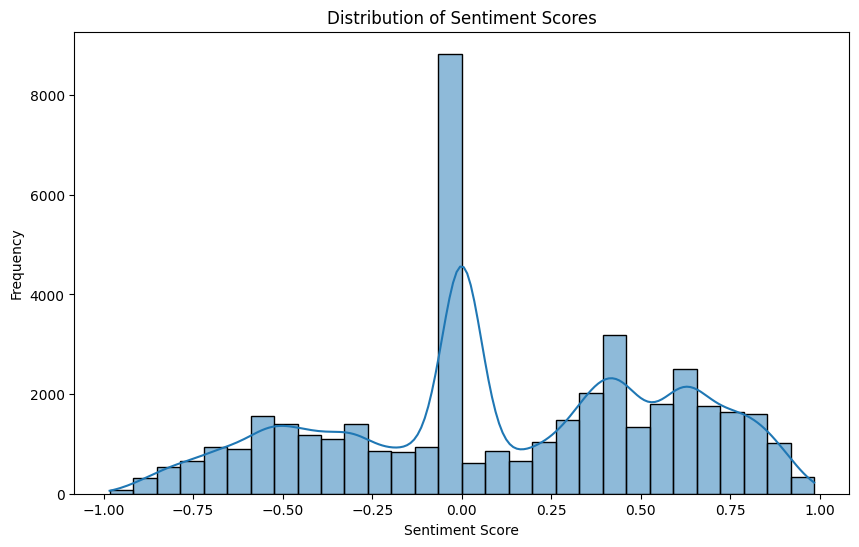

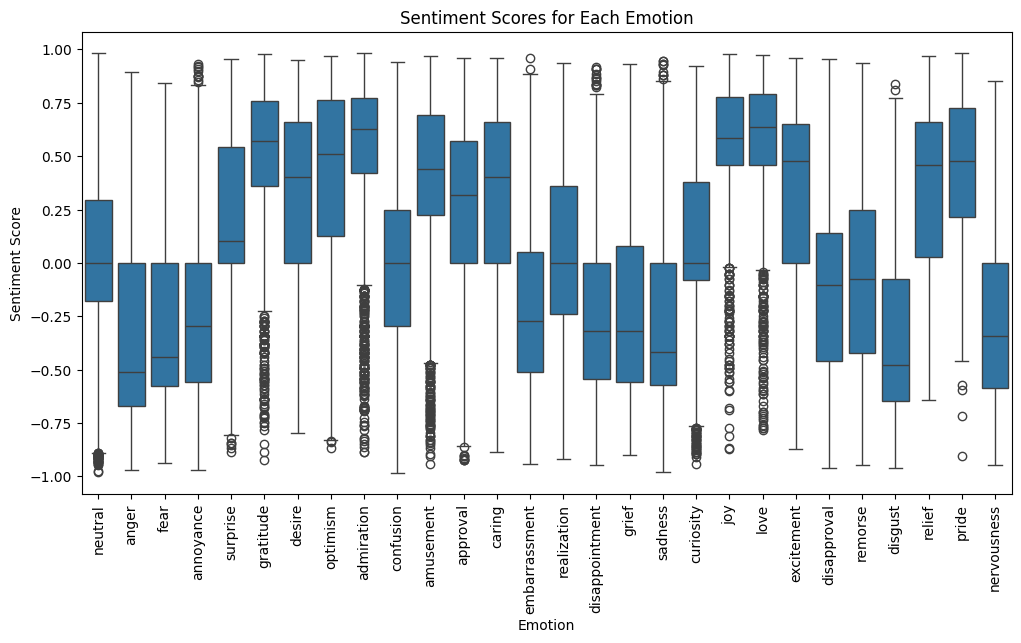

In [28]:
# Sentiment distribution
sentiment_scores = df_train['cleaned_text'].apply(get_sentiment)
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_scores, bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Sentiment vs. Emotion
df_train['sentiment'] = sentiment_scores
plt.figure(figsize=(12, 6))
sns.boxplot(x='emotions', y='sentiment', data=df_train.explode('emotions'))
plt.xticks(rotation=90)
plt.title('Sentiment Scores for Each Emotion')
plt.xlabel('Emotion')
plt.ylabel('Sentiment Score')
plt.show()


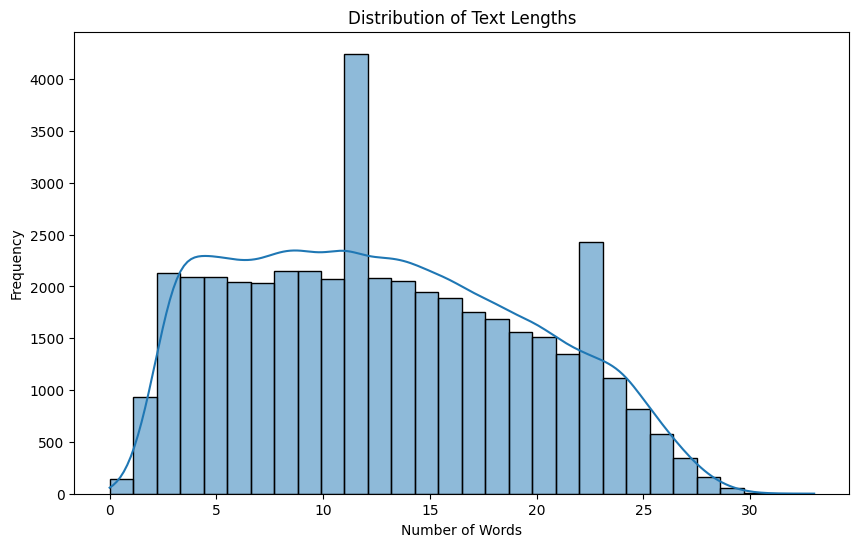

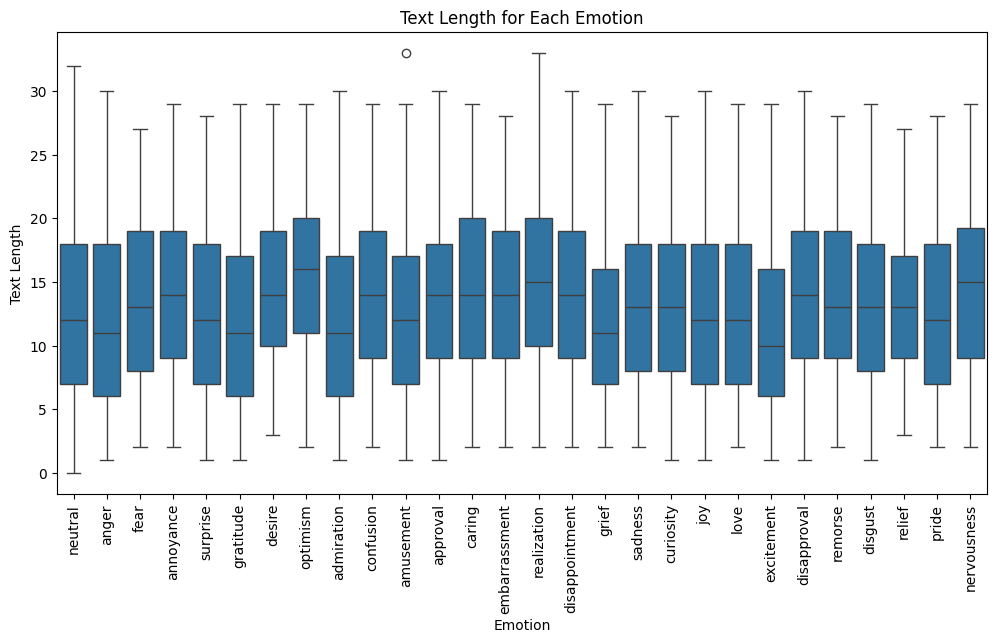

In [29]:
# Text length distribution
text_lengths = df_train['cleaned_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(text_lengths, bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Text length vs. Emotion
df_train['text_length'] = text_lengths
plt.figure(figsize=(12, 6))
sns.boxplot(x='emotions', y='text_length', data=df_train.explode('emotions'))
plt.xticks(rotation=90)
plt.title('Text Length for Each Emotion')
plt.xlabel('Emotion')
plt.ylabel('Text Length')
plt.show()


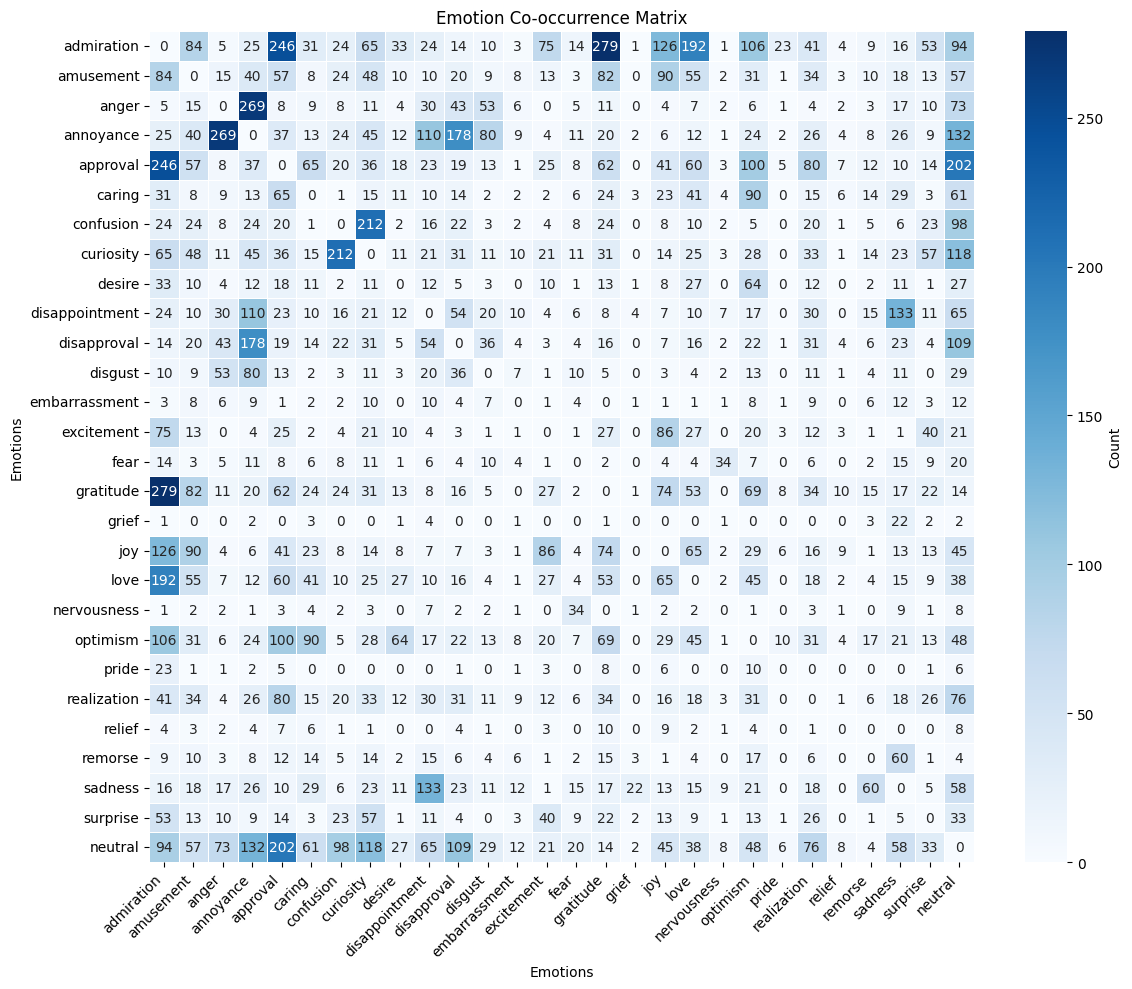

In [32]:
# Emotion co-occurrence matrix
from collections import Counter
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'emotions' is already defined as in your previous code

emotion_pairs = df_train['emotions'].apply(lambda x: list(itertools.combinations(sorted(x), 2)))
emotion_pairs = emotion_pairs.explode().dropna()
emotion_pair_counts = Counter(emotion_pairs)

# Initialize the co-occurrence matrix with zeros
emotion_cooccurrence_matrix = pd.DataFrame(0, index=emotions, columns=emotions)

# Populate the matrix with counts
for (e1, e2), count in emotion_pair_counts.items():
    emotion_cooccurrence_matrix.at[e1, e2] = count
    emotion_cooccurrence_matrix.at[e2, e1] = count

# Optionally, remove self-co-occurrence by setting diagonal to zero
np.fill_diagonal(emotion_cooccurrence_matrix.values, 0)

# Plot the heatmap with numeric annotations
plt.figure(figsize=(12, 10))
sns.heatmap(
    emotion_cooccurrence_matrix,
    annot=True,
    fmt="d",  # 'd' for integer format
    cmap='Blues',
    linewidths=.5,
    cbar_kws={'label': 'Count'}
)
plt.title('Emotion Co-occurrence Matrix')
plt.xlabel('Emotions')
plt.ylabel('Emotions')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


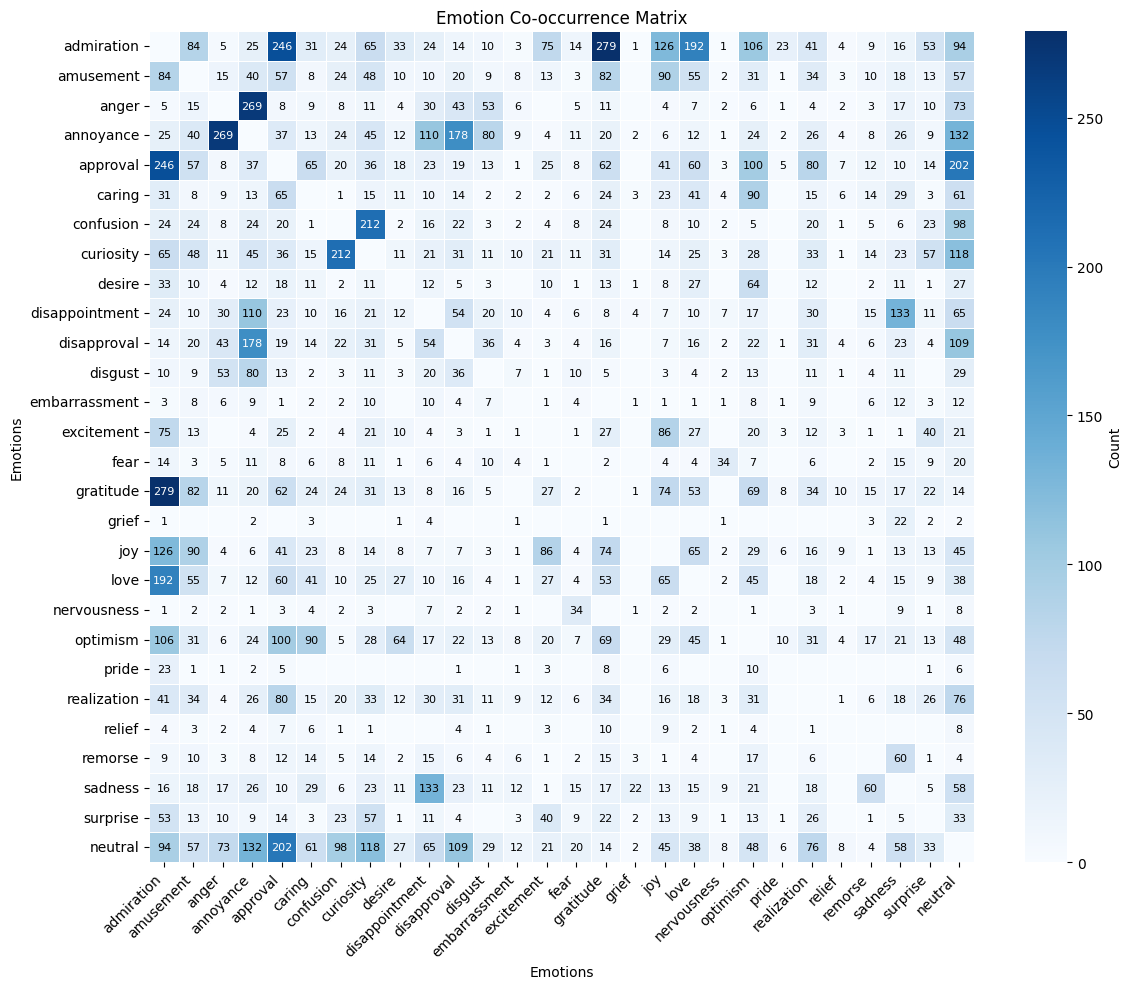

In [35]:
# Emotion co-occurrence matrix
from collections import Counter
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'emotions' is already defined as in your previous code

emotion_pairs = df_train['emotions'].apply(lambda x: list(itertools.combinations(sorted(x), 2)))
emotion_pairs = emotion_pairs.explode().dropna()
emotion_pair_counts = Counter(emotion_pairs)

# Initialize the co-occurrence matrix with zeros
emotion_cooccurrence_matrix = pd.DataFrame(0, index=emotions, columns=emotions)

# Populate the matrix with counts
for (e1, e2), count in emotion_pair_counts.items():
    emotion_cooccurrence_matrix.at[e1, e2] = count
    emotion_cooccurrence_matrix.at[e2, e1] = count

# Optionally, remove self-co-occurrence by setting diagonal to zero
np.fill_diagonal(emotion_cooccurrence_matrix.values, 0)

# Define a formatter for annotations
def heatmap_annot_format(val):
    if val >= 1000:
        return f"{val/1e3:.1f}k"  # Format as '1.2k' for thousands
    else:
        return str(int(val))       # Keep as integer for smaller values

# Create the heatmap without annotations
plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    emotion_cooccurrence_matrix,
    annot=False,  # Disable Seaborn's annotations
    fmt='',
    cmap='Blues',
    linewidths=.5,
    cbar_kws={'label': 'Count'}
)

# Add custom annotations
for i in range(emotion_cooccurrence_matrix.shape[0]):
    for j in range(emotion_cooccurrence_matrix.shape[1]):
        val = emotion_cooccurrence_matrix.iloc[i, j]
        if val != 0:  # Optionally skip zero values for cleaner visuals
            formatted_val = heatmap_annot_format(val)
            # Determine text color based on cell color for better visibility
            cell_color = emotion_cooccurrence_matrix.iloc[i, j]
            text_color = 'white' if cell_color > emotion_cooccurrence_matrix.values.max() * 0.5 else 'black'
            ax.text(j + 0.5, i + 0.5, formatted_val,
                    ha='center', va='center', color=text_color, fontsize=8)

plt.title('Emotion Co-occurrence Matrix')
plt.xlabel('Emotions')
plt.ylabel('Emotions')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


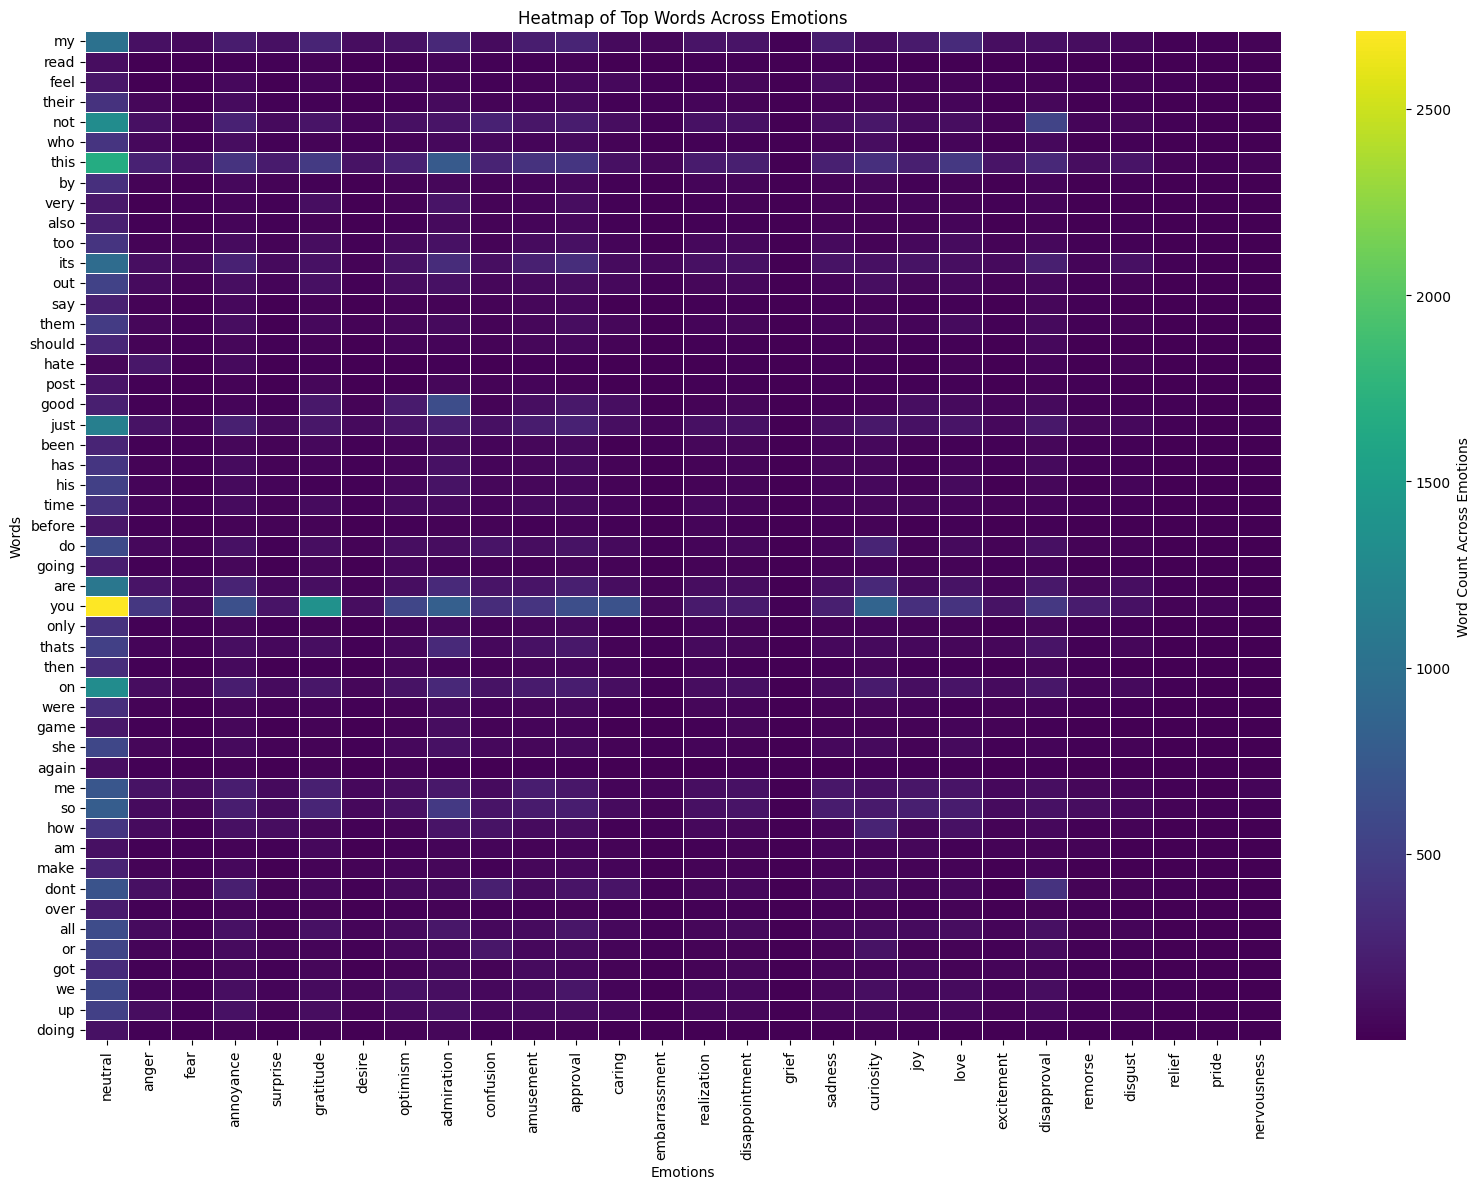

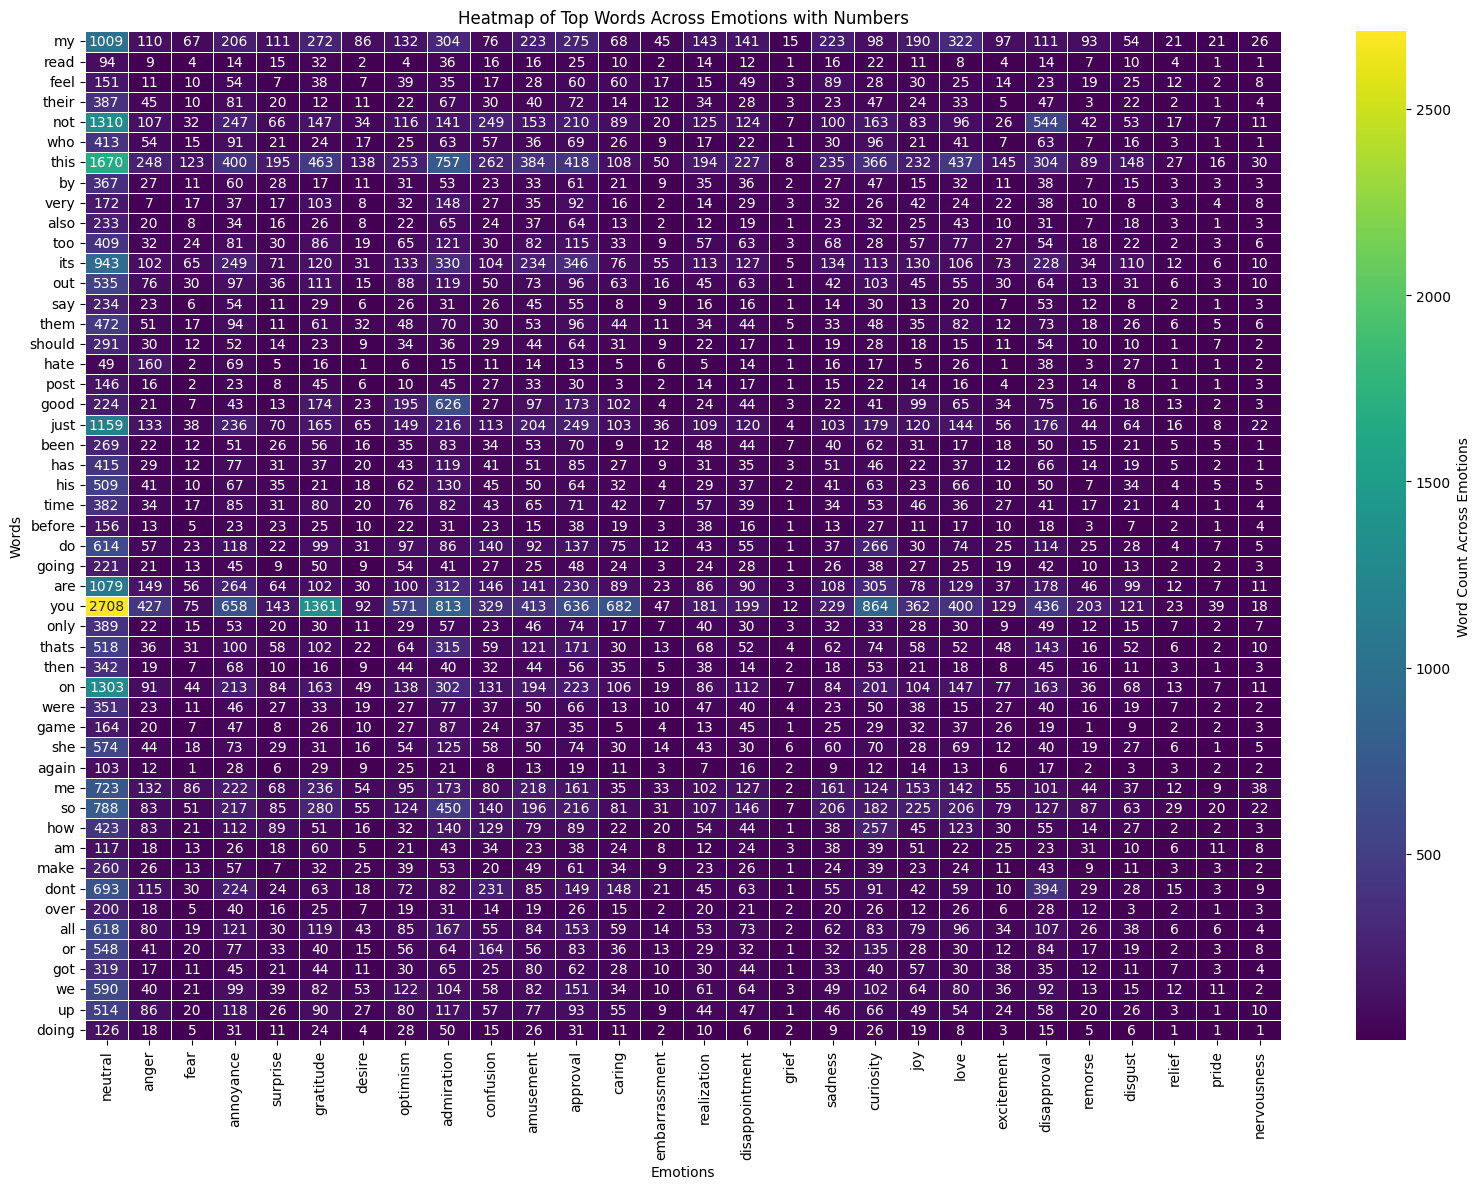

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

# Create the emotion-word counts dictionary
emotion_word_counts = defaultdict(Counter)
for _, row in df_train.iterrows():
    for emotion in row['emotions']:
        emotion_word_counts[emotion].update(row['cleaned_text'].split())

# Create a DataFrame for heatmap data
word_emotion_matrix = pd.DataFrame.from_dict(emotion_word_counts, orient='index').fillna(0).T

# Count the number of emotions each word is associated with
word_emotion_matrix['Emotion_Count'] = (word_emotion_matrix > 0).sum(axis=1)

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    word_emotion_matrix.sort_values('Emotion_Count', ascending=False).iloc[:50, :-1],  # Top 50 words
    cmap='viridis',
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"label": "Word Count Across Emotions"}
)
plt.title("Heatmap of Top Words Across Emotions")
plt.xlabel("Emotions")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


# Plot the numerical heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    word_emotion_matrix.sort_values('Emotion_Count', ascending=False).iloc[:50, :-1],  # Top 50 words
    cmap='viridis',
    linewidths=0.5,
    linecolor='white',
    annot=True,  # Annotate the heatmap with numbers
    fmt='.0f',   # Format numbers as integers
    cbar_kws={"label": "Word Count Across Emotions"}
)
plt.title("Heatmap of Top Words Across Emotions with Numbers")
plt.xlabel("Emotions")
plt.ylabel("Words")
plt.tight_layout()
plt.show()